# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
%matplotlib notebook

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

chunks=[cities[x:x+100] for x in range(0, len(cities), 10)]

len(chunks)

60

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name=[]
lat   = []
temp  = []
hum   = []
cloud = []
wind  = []


print("Beginning Data Retrieval")
print("-----------------------------")
i=1
for i in range(len(chunks)):
    for count,city in enumerate(chunks[i]):
        query_url = url + "appid=" + api_key + "&q=" + city
    
        #print(query_url)
    
        weather_response = requests.get(query_url).json()
        try:
            print("Processing Record {} of Set {} | {}".format(count+1,i+1,weather_response["name"]))
            city_name.append(weather_response["name"])
            lat.append(weather_response["coord"]['lat'])
            temp.append(weather_response["main"]['temp'])
            hum.append(weather_response["main"]['humidity'])
            cloud.append(weather_response["clouds"]['all'])
            wind.append(weather_response["wind"]['speed'])
            
        except KeyError:
            print("City not found",city)
print("-----------------------------")            
print("End of data processing")    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Bredasdorp
City not found camana
City not found taolanaro
Processing Record 4 of Set 1 | Busselton
Processing Record 5 of Set 1 | Pevek
Processing Record 6 of Set 1 | Albany
Processing Record 7 of Set 1 | Kapaa
Processing Record 8 of Set 1 | Lata
Processing Record 9 of Set 1 | Bethel
Processing Record 10 of Set 1 | Airai
Processing Record 11 of Set 1 | Sambava
Processing Record 12 of Set 1 | Port Alfred
Processing Record 13 of Set 1 | Ust-Ilimsk
Processing Record 14 of Set 1 | Rikitea
Processing Record 15 of Set 1 | Kavieng
Processing Record 16 of Set 1 | Porto de Moz
Processing Record 17 of Set 1 | Henties Bay
Processing Record 18 of Set 1 | Ayame
Processing Record 19 of Set 1 | Dikson
Processing Record 20 of Set 1 | Sibolga
Processing Record 21 of Set 1 | Sarkand
Processing Record 22 of Set 1 | Srednekolymsk
Processing Record 23 of Set 1 | Iqaluit
Processing Record 24 of Set 1 | Bluff
Processing Rec

Processing Record 13 of Set 3 | Katsuura
Processing Record 14 of Set 3 | Abu Samrah
Processing Record 15 of Set 3 | New Norfolk
Processing Record 16 of Set 3 | Kampene
Processing Record 17 of Set 3 | Mataura
Processing Record 18 of Set 3 | Saint Lawrence
Processing Record 19 of Set 3 | Hanko
City not found saleaula
Processing Record 21 of Set 3 | Havre-Saint-Pierre
Processing Record 22 of Set 3 | Kayerkan
Processing Record 23 of Set 3 | Laguna
Processing Record 24 of Set 3 | Ushuaia
Processing Record 25 of Set 3 | Starokucherganovka
Processing Record 26 of Set 3 | Punta Arenas
Processing Record 27 of Set 3 | Awbari
Processing Record 28 of Set 3 | Hamilton
Processing Record 29 of Set 3 | Vaini
Processing Record 30 of Set 3 | Takoradi
Processing Record 31 of Set 3 | Victoria
Processing Record 32 of Set 3 | Tiksi
Processing Record 33 of Set 3 | Mahebourg
Processing Record 34 of Set 3 | Salalah
Processing Record 35 of Set 3 | Puerto Ayora
Processing Record 36 of Set 3 | Namibe
Processing R

City not found iringa
Processing Record 29 of Set 5 | Te Anau
Processing Record 30 of Set 5 | Jais
Processing Record 31 of Set 5 | Mayo
Processing Record 32 of Set 5 | Kargasok
Processing Record 33 of Set 5 | Aklavik
Processing Record 34 of Set 5 | Butaritari
Processing Record 35 of Set 5 | Itoman
Processing Record 36 of Set 5 | Lorengau
Processing Record 37 of Set 5 | Doha
Processing Record 38 of Set 5 | Beloha
Processing Record 39 of Set 5 | Paso de los Toros
Processing Record 40 of Set 5 | Mehtar Lam
Processing Record 41 of Set 5 | Kavaratti
Processing Record 42 of Set 5 | Lufilufi
Processing Record 43 of Set 5 | Mbeya
Processing Record 44 of Set 5 | Tigil
Processing Record 45 of Set 5 | Mgachi
Processing Record 46 of Set 5 | Tuatapere
Processing Record 47 of Set 5 | Moindou
City not found bairiki
Processing Record 49 of Set 5 | Kodiak
Processing Record 50 of Set 5 | La Tuque
Processing Record 51 of Set 5 | Mersing
Processing Record 52 of Set 5 | Aripuana
Processing Record 53 of Set

Processing Record 40 of Set 7 | Lira
Processing Record 41 of Set 7 | Yellowknife
Processing Record 42 of Set 7 | Ixtapa
Processing Record 43 of Set 7 | Yulara
Processing Record 44 of Set 7 | Cape Town
Processing Record 45 of Set 7 | Nelson Bay
City not found attawapiskat
Processing Record 47 of Set 7 | Narsaq
Processing Record 48 of Set 7 | Pisco
City not found tumannyy
Processing Record 50 of Set 7 | Yining
Processing Record 51 of Set 7 | Angoche
Processing Record 52 of Set 7 | Hilo
Processing Record 53 of Set 7 | Atuona
Processing Record 54 of Set 7 | Klaksvik
Processing Record 55 of Set 7 | Coquimbo
Processing Record 56 of Set 7 | Mar del Plata
Processing Record 57 of Set 7 | Bathsheba
Processing Record 58 of Set 7 | Dongsheng
Processing Record 59 of Set 7 | Dunedin
City not found belushya guba
Processing Record 61 of Set 7 | Fortuna
Processing Record 62 of Set 7 | Cururupu
Processing Record 63 of Set 7 | Faya
Processing Record 64 of Set 7 | Saldanha
Processing Record 65 of Set 7 | 

Processing Record 51 of Set 9 | Rio Gallegos
Processing Record 52 of Set 9 | Sagae
Processing Record 53 of Set 9 | Umm Lajj
Processing Record 54 of Set 9 | Havoysund
Processing Record 55 of Set 9 | Jamestown
Processing Record 56 of Set 9 | San Quintin
Processing Record 57 of Set 9 | Saskylakh
Processing Record 58 of Set 9 | Anadyr
Processing Record 59 of Set 9 | Saint-Philippe
Processing Record 60 of Set 9 | Nantucket
Processing Record 61 of Set 9 | Kloulklubed
Processing Record 62 of Set 9 | Hambantota
Processing Record 63 of Set 9 | La Mana
Processing Record 64 of Set 9 | Kalmunai
Processing Record 65 of Set 9 | Barrow
Processing Record 66 of Set 9 | At-Bashi
Processing Record 67 of Set 9 | Georgetown
Processing Record 68 of Set 9 | Lebu
Processing Record 69 of Set 9 | Kikwit
City not found bengkulu
Processing Record 71 of Set 9 | Torbay
Processing Record 72 of Set 9 | Norman Wells
City not found amderma
Processing Record 74 of Set 9 | Yarmouth
Processing Record 75 of Set 9 | Sisimiu

Processing Record 61 of Set 11 | Victor Harbor
Processing Record 62 of Set 11 | Mindelo
City not found illoqqortoormiut
Processing Record 64 of Set 11 | Caravelas
Processing Record 65 of Set 11 | Ust-Kuyga
City not found asau
Processing Record 67 of Set 11 | Kamyaran
City not found sembe
City not found skagastrond
Processing Record 70 of Set 11 | Starovelichkovskaya
Processing Record 71 of Set 11 | Thompson
City not found zachagansk
Processing Record 73 of Set 11 | Kenai
Processing Record 74 of Set 11 | Palu
Processing Record 75 of Set 11 | Los Llanos de Aridane
Processing Record 76 of Set 11 | Mazagao
Processing Record 77 of Set 11 | Ler
Processing Record 78 of Set 11 | Sonoita
Processing Record 79 of Set 11 | Beringovskiy
Processing Record 80 of Set 11 | Standerton
Processing Record 81 of Set 11 | Ewo
Processing Record 82 of Set 11 | Agadez
Processing Record 83 of Set 11 | La Ronge
Processing Record 84 of Set 11 | Muzhi
Processing Record 85 of Set 11 | Kamenka
Processing Record 86 of

Processing Record 68 of Set 13 | Mapiripan
City not found tungkang
Processing Record 70 of Set 13 | Tepalcatepec
Processing Record 71 of Set 13 | Benicarlo
Processing Record 72 of Set 13 | Husavik
Processing Record 73 of Set 13 | Pandan
Processing Record 74 of Set 13 | Corlatel
Processing Record 75 of Set 13 | Selcuk
Processing Record 76 of Set 13 | Berlevag
Processing Record 77 of Set 13 | Manakara
City not found tarhunah
Processing Record 79 of Set 13 | Taoudenni
Processing Record 80 of Set 13 | Enkoping
Processing Record 81 of Set 13 | Saint-Augustin
Processing Record 82 of Set 13 | Barahona
Processing Record 83 of Set 13 | Great Bend
Processing Record 84 of Set 13 | Pomabamba
Processing Record 85 of Set 13 | Gat
Processing Record 86 of Set 13 | Bonavista
Processing Record 87 of Set 13 | Bambous Virieux
Processing Record 88 of Set 13 | Nioaque
Processing Record 89 of Set 13 | Vestmanna
City not found samusu
Processing Record 91 of Set 13 | Road Town
Processing Record 92 of Set 13 | 

Processing Record 74 of Set 15 | Sur
City not found alotau
Processing Record 76 of Set 15 | Havelock
Processing Record 77 of Set 15 | Severo-Yeniseyskiy
Processing Record 78 of Set 15 | Santander Jimenez
Processing Record 79 of Set 15 | Leningradskiy
Processing Record 80 of Set 15 | Aykhal
Processing Record 81 of Set 15 | Iturama
Processing Record 82 of Set 15 | San Patricio
Processing Record 83 of Set 15 | Bakuriani
Processing Record 84 of Set 15 | Ouallam
Processing Record 85 of Set 15 | Chuy
City not found katha
Processing Record 87 of Set 15 | Canazas
Processing Record 88 of Set 15 | Santa Maria
Processing Record 89 of Set 15 | Jiangyou
Processing Record 90 of Set 15 | Ambagarh Chauki
Processing Record 91 of Set 15 | Ribeira Grande
Processing Record 92 of Set 15 | Kemise
Processing Record 93 of Set 15 | Suez
Processing Record 94 of Set 15 | Tasiilaq
Processing Record 95 of Set 15 | Nikolskoye
Processing Record 96 of Set 15 | Port Elizabeth
Processing Record 97 of Set 15 | Okhotsk
C

Processing Record 79 of Set 17 | Mattru
Processing Record 80 of Set 17 | Port Lincoln
Processing Record 81 of Set 17 | Vao
Processing Record 82 of Set 17 | Fort Smith
Processing Record 83 of Set 17 | Malpe
Processing Record 84 of Set 17 | Darhan
Processing Record 85 of Set 17 | Aragarcas
Processing Record 86 of Set 17 | Udachnyy
City not found olafsvik
Processing Record 88 of Set 17 | Channel-Port aux Basques
Processing Record 89 of Set 17 | Sao Jose da Coroa Grande
Processing Record 90 of Set 17 | Phalaborwa
Processing Record 91 of Set 17 | Otradnoye
Processing Record 92 of Set 17 | Carnarvon
Processing Record 93 of Set 17 | Tura
Processing Record 94 of Set 17 | Pangnirtung
Processing Record 95 of Set 17 | Viedma
Processing Record 96 of Set 17 | Ous
Processing Record 97 of Set 17 | Ahipara
Processing Record 98 of Set 17 | Aitape
Processing Record 99 of Set 17 | Ingham
City not found gazni
Processing Record 1 of Set 18 | Thompson
City not found zachagansk
Processing Record 3 of Set 18 

City not found gazni
Processing Record 81 of Set 19 | Cuajinicuilapa
Processing Record 82 of Set 19 | Deputatskiy
Processing Record 83 of Set 19 | Namatanai
Processing Record 84 of Set 19 | Aguas Formosas
Processing Record 85 of Set 19 | Zheleznodorozhnyy
Processing Record 86 of Set 19 | Cookeville
Processing Record 87 of Set 19 | Mmathubudukwane
Processing Record 88 of Set 19 | Hobyo
Processing Record 89 of Set 19 | Kaitangata
Processing Record 90 of Set 19 | Otavi
Processing Record 91 of Set 19 | Linares
Processing Record 92 of Set 19 | Mount Gambier
Processing Record 93 of Set 19 | Rovenki
Processing Record 94 of Set 19 | Bakal
Processing Record 95 of Set 19 | Yumen
Processing Record 96 of Set 19 | Kirakira
Processing Record 97 of Set 19 | Kruisfontein
Processing Record 98 of Set 19 | Provideniya
Processing Record 99 of Set 19 | San Policarpo
Processing Record 100 of Set 19 | Nadvoitsy
Processing Record 1 of Set 20 | Benicarlo
Processing Record 2 of Set 20 | Husavik
Processing Recor

Processing Record 78 of Set 21 | Provideniya
Processing Record 79 of Set 21 | San Policarpo
Processing Record 80 of Set 21 | Nadvoitsy
Processing Record 81 of Set 21 | Bandarbeyla
City not found babanusah
Processing Record 83 of Set 21 | Kijang
Processing Record 84 of Set 21 | San Jose de Guanipa
City not found ituni
Processing Record 86 of Set 21 | Barra do Garcas
Processing Record 87 of Set 21 | Pilar
Processing Record 88 of Set 21 | Kyshtovka
City not found khonuu
Processing Record 90 of Set 21 | Broken Hill
City not found sumbawa
Processing Record 92 of Set 21 | San Vicente
Processing Record 93 of Set 21 | Quatre Cocos
Processing Record 94 of Set 21 | Vestmannaeyjar
Processing Record 95 of Set 21 | Contai
Processing Record 96 of Set 21 | La Tiza
Processing Record 97 of Set 21 | Lashio
Processing Record 98 of Set 21 | Basco
Processing Record 99 of Set 21 | Cidreira
Processing Record 100 of Set 21 | Ondjiva
Processing Record 1 of Set 22 | Road Town
Processing Record 2 of Set 22 | Sve

Processing Record 80 of Set 23 | Ondjiva
Processing Record 81 of Set 23 | Obzor
Processing Record 82 of Set 23 | Bulata
City not found bousso
Processing Record 84 of Set 23 | Constitucion
Processing Record 85 of Set 23 | Cabinda
Processing Record 86 of Set 23 | Morgan City
Processing Record 87 of Set 23 | Handan
Processing Record 88 of Set 23 | Mbamba
Processing Record 89 of Set 23 | Marevo
Processing Record 90 of Set 23 | Severo-Kurilsk
Processing Record 91 of Set 23 | Slavuta
Processing Record 92 of Set 23 | Sampit
Processing Record 93 of Set 23 | Xinzhi
Processing Record 94 of Set 23 | Aktyubinskiy
Processing Record 95 of Set 23 | Arraial do Cabo
Processing Record 96 of Set 23 | Hithadhoo
Processing Record 97 of Set 23 | Teshie
Processing Record 98 of Set 23 | Khatanga
Processing Record 99 of Set 23 | Hovd
Processing Record 100 of Set 23 | Cuamba
Processing Record 1 of Set 24 | Ribeira Grande
Processing Record 2 of Set 24 | Kemise
Processing Record 3 of Set 24 | Suez
Processing Reco

City not found umm durman
Processing Record 83 of Set 25 | Jieshi
Processing Record 84 of Set 25 | Ebolowa
Processing Record 85 of Set 25 | Lompoc
Processing Record 86 of Set 25 | Upernavik
Processing Record 87 of Set 25 | Zachary
Processing Record 88 of Set 25 | Conceicao da Barra
City not found tsienyane
Processing Record 90 of Set 25 | Sabha
Processing Record 91 of Set 25 | Cabo San Lucas
Processing Record 92 of Set 25 | Begoro
Processing Record 93 of Set 25 | Majene
Processing Record 94 of Set 25 | Ornskoldsvik
Processing Record 95 of Set 25 | Riyadh
Processing Record 96 of Set 25 | Orasac
Processing Record 97 of Set 25 | Luderitz
Processing Record 98 of Set 25 | Verkhoyansk
Processing Record 99 of Set 25 | Najran
Processing Record 100 of Set 25 | Seoul
Processing Record 1 of Set 26 | Otradnoye
Processing Record 2 of Set 26 | Carnarvon
Processing Record 3 of Set 26 | Tura
Processing Record 4 of Set 26 | Pangnirtung
Processing Record 5 of Set 26 | Viedma
Processing Record 6 of Set 2

Processing Record 86 of Set 27 | Luba
Processing Record 87 of Set 27 | Villa Maria
Processing Record 88 of Set 27 | Gigmoto
Processing Record 89 of Set 27 | Ossora
Processing Record 90 of Set 27 | Alofi
Processing Record 91 of Set 27 | Padang
Processing Record 92 of Set 27 | Araouane
Processing Record 93 of Set 27 | Sandwick
Processing Record 94 of Set 27 | Jacksonville
Processing Record 95 of Set 27 | Lasa
Processing Record 96 of Set 27 | Kempsey
City not found kristiinankaupunki
Processing Record 98 of Set 27 | Turki
Processing Record 99 of Set 27 | Chimbarongo
Processing Record 100 of Set 27 | Yuzhno-Kurilsk
Processing Record 1 of Set 28 | Linares
Processing Record 2 of Set 28 | Mount Gambier
Processing Record 3 of Set 28 | Rovenki
Processing Record 4 of Set 28 | Bakal
Processing Record 5 of Set 28 | Yumen
Processing Record 6 of Set 28 | Kirakira
Processing Record 7 of Set 28 | Kruisfontein
Processing Record 8 of Set 28 | Provideniya
Processing Record 9 of Set 28 | San Policarpo
Pro

Processing Record 89 of Set 29 | Nguru
Processing Record 90 of Set 29 | Morant Bay
Processing Record 91 of Set 29 | Novoalekseyevskaya
Processing Record 92 of Set 29 | Burgeo
Processing Record 93 of Set 29 | Rocha
Processing Record 94 of Set 29 | Lukulu
Processing Record 95 of Set 29 | Hofn
Processing Record 96 of Set 29 | Shingu
Processing Record 97 of Set 29 | Isangel
City not found inderborskiy
Processing Record 99 of Set 29 | Izmir
Processing Record 100 of Set 29 | Fairbanks
City not found sumbawa
Processing Record 2 of Set 30 | San Vicente
Processing Record 3 of Set 30 | Quatre Cocos
Processing Record 4 of Set 30 | Vestmannaeyjar
Processing Record 5 of Set 30 | Contai
Processing Record 6 of Set 30 | La Tiza
Processing Record 7 of Set 30 | Lashio
Processing Record 8 of Set 30 | Basco
Processing Record 9 of Set 30 | Cidreira
Processing Record 10 of Set 30 | Ondjiva
Processing Record 11 of Set 30 | Obzor
Processing Record 12 of Set 30 | Bulata
City not found bousso
Processing Record 

City not found krasnoselkup
Processing Record 93 of Set 31 | Luang Prabang
Processing Record 94 of Set 31 | Matara
Processing Record 95 of Set 31 | Mamanguape
Processing Record 96 of Set 31 | Acapulco
Processing Record 97 of Set 31 | Orodara
Processing Record 98 of Set 31 | Souillac
City not found hihifo
Processing Record 100 of Set 31 | Herat
Processing Record 1 of Set 32 | Slavuta
Processing Record 2 of Set 32 | Sampit
Processing Record 3 of Set 32 | Xinzhi
Processing Record 4 of Set 32 | Aktyubinskiy
Processing Record 5 of Set 32 | Arraial do Cabo
Processing Record 6 of Set 32 | Hithadhoo
Processing Record 7 of Set 32 | Teshie
Processing Record 8 of Set 32 | Khatanga
Processing Record 9 of Set 32 | Hovd
Processing Record 10 of Set 32 | Cuamba
City not found vaitupu
City not found umm durman
Processing Record 13 of Set 32 | Jieshi
Processing Record 14 of Set 32 | Ebolowa
Processing Record 15 of Set 32 | Lompoc
Processing Record 16 of Set 32 | Upernavik
Processing Record 17 of Set 32 

Processing Record 97 of Set 33 | Anajatuba
Processing Record 98 of Set 33 | Abu Dhabi
Processing Record 99 of Set 33 | Ilulissat
Processing Record 100 of Set 33 | Mlowo
Processing Record 1 of Set 34 | Cabo San Lucas
Processing Record 2 of Set 34 | Begoro
Processing Record 3 of Set 34 | Majene
Processing Record 4 of Set 34 | Ornskoldsvik
Processing Record 5 of Set 34 | Riyadh
Processing Record 6 of Set 34 | Orasac
Processing Record 7 of Set 34 | Luderitz
Processing Record 8 of Set 34 | Verkhoyansk
Processing Record 9 of Set 34 | Najran
Processing Record 10 of Set 34 | Seoul
Processing Record 11 of Set 34 | Moose Factory
Processing Record 12 of Set 34 | Faanui
Processing Record 13 of Set 34 | Marsh Harbour
Processing Record 14 of Set 34 | Ryotsu
Processing Record 15 of Set 34 | Jamame
Processing Record 16 of Set 34 | Luba
Processing Record 17 of Set 34 | Villa Maria
Processing Record 18 of Set 34 | Gigmoto
Processing Record 19 of Set 34 | Ossora
Processing Record 20 of Set 34 | Alofi
Pro

Processing Record 99 of Set 35 | Yakima
Processing Record 100 of Set 35 | Praia
Processing Record 1 of Set 36 | Padang
Processing Record 2 of Set 36 | Araouane
Processing Record 3 of Set 36 | Sandwick
Processing Record 4 of Set 36 | Jacksonville
Processing Record 5 of Set 36 | Lasa
Processing Record 6 of Set 36 | Kempsey
City not found kristiinankaupunki
Processing Record 8 of Set 36 | Turki
Processing Record 9 of Set 36 | Chimbarongo
Processing Record 10 of Set 36 | Yuzhno-Kurilsk
Processing Record 11 of Set 36 | Flinders
Processing Record 12 of Set 36 | Tazmalt
Processing Record 13 of Set 36 | Camacha
Processing Record 14 of Set 36 | Vila
Processing Record 15 of Set 36 | Araceli
Processing Record 16 of Set 36 | Clyde River
Processing Record 17 of Set 36 | Olinda
Processing Record 18 of Set 36 | Lavrentiya
Processing Record 19 of Set 36 | Nguru
Processing Record 20 of Set 36 | Morant Bay
Processing Record 21 of Set 36 | Novoalekseyevskaya
Processing Record 22 of Set 36 | Burgeo
Proces

Processing Record 5 of Set 38 | Hofn
Processing Record 6 of Set 38 | Shingu
Processing Record 7 of Set 38 | Isangel
City not found inderborskiy
Processing Record 9 of Set 38 | Izmir
Processing Record 10 of Set 38 | Fairbanks
Processing Record 11 of Set 38 | Vanavara
Processing Record 12 of Set 38 | Noumea
City not found umzimvubu
Processing Record 14 of Set 38 | Klyuchi
Processing Record 15 of Set 38 | Poltava
Processing Record 16 of Set 38 | Saint-Georges
Processing Record 17 of Set 38 | Floro
Processing Record 18 of Set 38 | Omboue
Processing Record 19 of Set 38 | Akcaabat
Processing Record 20 of Set 38 | Nouadhibou
Processing Record 21 of Set 38 | Sadon
City not found krasnoselkup
Processing Record 23 of Set 38 | Luang Prabang
Processing Record 24 of Set 38 | Matara
Processing Record 25 of Set 38 | Mamanguape
Processing Record 26 of Set 38 | Acapulco
Processing Record 27 of Set 38 | Orodara
Processing Record 28 of Set 38 | Souillac
City not found hihifo
Processing Record 30 of Set 3

Processing Record 12 of Set 40 | Nador
Processing Record 13 of Set 40 | Rock Sound
Processing Record 14 of Set 40 | Brae
Processing Record 15 of Set 40 | Manzanillo
Processing Record 16 of Set 40 | Chokurdakh
Processing Record 17 of Set 40 | Saint George
Processing Record 18 of Set 40 | Ordzhonikidze
Processing Record 19 of Set 40 | Thunder Bay
Processing Record 20 of Set 40 | Kangaatsiaq
Processing Record 21 of Set 40 | Vardo
Processing Record 22 of Set 40 | Nemuro
Processing Record 23 of Set 40 | Esperance
Processing Record 24 of Set 40 | Sompeta
Processing Record 25 of Set 40 | Port Blair
Processing Record 26 of Set 40 | Chapais
Processing Record 27 of Set 40 | Anajatuba
Processing Record 28 of Set 40 | Abu Dhabi
Processing Record 29 of Set 40 | Ilulissat
Processing Record 30 of Set 40 | Mlowo
Processing Record 31 of Set 40 | Saint Anthony
Processing Record 32 of Set 40 | Usvyaty
Processing Record 33 of Set 40 | Santa Rosalia
Processing Record 34 of Set 40 | Fort Nelson
Processing R

Processing Record 16 of Set 42 | Ixtlahuacan del Rio
Processing Record 17 of Set 42 | Taltal
Processing Record 18 of Set 42 | Mayumba
City not found marcona
City not found betioky
Processing Record 21 of Set 42 | Bakel
City not found warqla
Processing Record 23 of Set 42 | Athabasca
Processing Record 24 of Set 42 | Jiayuguan
City not found skalistyy
Processing Record 26 of Set 42 | Tessalit
Processing Record 27 of Set 42 | Sao Filipe
Processing Record 28 of Set 42 | Necochea
Processing Record 29 of Set 42 | Yakima
Processing Record 30 of Set 42 | Praia
Processing Record 31 of Set 42 | Sao Joao da Barra
Processing Record 32 of Set 42 | Geraldton
Processing Record 33 of Set 42 | Port Hardy
Processing Record 34 of Set 42 | Maldonado
Processing Record 35 of Set 42 | Nanortalik
Processing Record 36 of Set 42 | Solnechnyy
Processing Record 37 of Set 42 | Ballina
Processing Record 38 of Set 42 | Novichikha
Processing Record 39 of Set 42 | Adrar
Processing Record 40 of Set 42 | Kuytun
Processi

Processing Record 19 of Set 44 | Adrar
Processing Record 20 of Set 44 | Kuytun
Processing Record 21 of Set 44 | Kalispell
Processing Record 22 of Set 44 | Lagoa
Processing Record 23 of Set 44 | Nishihara
Processing Record 24 of Set 44 | Pachino
Processing Record 25 of Set 44 | Limbang
Processing Record 26 of Set 44 | Zhuhai
Processing Record 27 of Set 44 | Aksarka
Processing Record 28 of Set 44 | Ringebu
Processing Record 29 of Set 44 | Port-Cartier
Processing Record 30 of Set 44 | Capoterra
Processing Record 31 of Set 44 | Champerico
Processing Record 32 of Set 44 | Coahuayana
Processing Record 33 of Set 44 | Mitsamiouli
Processing Record 34 of Set 44 | Taperoa
Processing Record 35 of Set 44 | Yakovlevka
City not found zouxian
Processing Record 37 of Set 44 | Yatou
City not found lolua
Processing Record 39 of Set 44 | Cayenne
Processing Record 40 of Set 44 | Jacareacanga
Processing Record 41 of Set 44 | Grindavik
Processing Record 42 of Set 44 | Bukachacha
Processing Record 43 of Set 

Processing Record 24 of Set 46 | Coffs Harbour
Processing Record 25 of Set 46 | Qiongshan
Processing Record 26 of Set 46 | Barbastro
Processing Record 27 of Set 46 | Sosua
Processing Record 28 of Set 46 | Dubai
Processing Record 29 of Set 46 | Eastbourne
Processing Record 30 of Set 46 | Dukat
Processing Record 31 of Set 46 | Koulikoro
City not found thilogne
Processing Record 33 of Set 46 | Benghazi
Processing Record 34 of Set 46 | Marzuq
Processing Record 35 of Set 46 | Hornepayne
City not found bur gabo
Processing Record 37 of Set 46 | Mbandaka
Processing Record 38 of Set 46 | Port Macquarie
Processing Record 39 of Set 46 | Lao Cai
Processing Record 40 of Set 46 | Balaguer
Processing Record 41 of Set 46 | Shubarshi
City not found ngukurr
Processing Record 43 of Set 46 | Rehoboth
Processing Record 44 of Set 46 | Riom
Processing Record 45 of Set 46 | Koshurnikovo
City not found chagda
Processing Record 47 of Set 46 | Naryan-Mar
City not found palabuhanratu
Processing Record 49 of Set 4

City not found palabuhanratu
Processing Record 29 of Set 48 | Tecpan
Processing Record 30 of Set 48 | Codrington
Processing Record 31 of Set 48 | Saint-Francois
Processing Record 32 of Set 48 | Uglerodovskiy
Processing Record 33 of Set 48 | Kalemie
Processing Record 34 of Set 48 | Traverse City
Processing Record 35 of Set 48 | Kolyshley
Processing Record 36 of Set 48 | Safranbolu
Processing Record 37 of Set 48 | Aquidauana
Processing Record 38 of Set 48 | Port Moresby
Processing Record 39 of Set 48 | Sinnamary
Processing Record 40 of Set 48 | Puerto Escondido
Processing Record 41 of Set 48 | Gerash
Processing Record 42 of Set 48 | Sena Madureira
Processing Record 43 of Set 48 | Myski
Processing Record 44 of Set 48 | Korem
Processing Record 45 of Set 48 | Usinsk
Processing Record 46 of Set 48 | Kilindoni
Processing Record 47 of Set 48 | Inhambane
Processing Record 48 of Set 48 | Itabira
Processing Record 49 of Set 48 | Raposa
Processing Record 50 of Set 48 | Prince Rupert
Processing Rec

Processing Record 34 of Set 50 | Muros
Processing Record 35 of Set 50 | Turayf
Processing Record 36 of Set 50 | Praxedis Guerrero
City not found burica
Processing Record 38 of Set 50 | Bam
Processing Record 39 of Set 50 | Sawai Madhopur
Processing Record 40 of Set 50 | Longyan
Processing Record 41 of Set 50 | Carmelo
City not found tongsa
Processing Record 43 of Set 50 | Kingsland
Processing Record 44 of Set 50 | Tokomaru
Processing Record 45 of Set 50 | Seydisehir
Processing Record 46 of Set 50 | Chipinge
Processing Record 47 of Set 50 | Megion
Processing Record 48 of Set 50 | Raudeberg
Processing Record 49 of Set 50 | Sakaiminato
Processing Record 50 of Set 50 | Diffa
Processing Record 51 of Set 50 | Puro
Processing Record 52 of Set 50 | Sao Felix do Xingu
Processing Record 53 of Set 50 | Shieli
Processing Record 54 of Set 50 | Ambon
Processing Record 55 of Set 50 | Nizhniy Odes
Processing Record 56 of Set 50 | Bosaso
Processing Record 57 of Set 50 | Gombong
Processing Record 58 of S

Processing Record 43 of Set 52 | Paita
Processing Record 44 of Set 52 | Vallenar
Processing Record 45 of Set 52 | Kathmandu
Processing Record 46 of Set 52 | El Alto
Processing Record 47 of Set 52 | Erzurum
Processing Record 48 of Set 52 | Itarema
Processing Record 49 of Set 52 | Zhezkazgan
City not found longlac
Processing Record 51 of Set 52 | Knysna
Processing Record 52 of Set 52 | Kurilsk
Processing Record 53 of Set 52 | Xining
Processing Record 54 of Set 52 | Baruun-Urt
Processing Record 55 of Set 52 | Gazli
City not found sorvag
Processing Record 57 of Set 52 | Pangody
Processing Record 58 of Set 52 | Whitehorse
Processing Record 59 of Set 52 | Odoyev
City not found ust-kamchatsk
Processing Record 61 of Set 52 | Kimbe
City not found toliary
City not found tres lagoas
Processing Record 64 of Set 52 | Thinadhoo
Processing Record 65 of Set 52 | Inta
Processing Record 66 of Set 52 | Myslenice
Processing Record 67 of Set 52 | Aleksandrov Gay
Processing Record 68 of Set 52 | Danjiangkou

Processing Record 21 of Set 55 | Knysna
Processing Record 22 of Set 55 | Kurilsk
Processing Record 23 of Set 55 | Xining
Processing Record 24 of Set 55 | Baruun-Urt
Processing Record 25 of Set 55 | Gazli
City not found sorvag
Processing Record 27 of Set 55 | Pangody
Processing Record 28 of Set 55 | Whitehorse
Processing Record 29 of Set 55 | Odoyev
City not found ust-kamchatsk
Processing Record 31 of Set 55 | Kimbe
City not found toliary
City not found tres lagoas
Processing Record 34 of Set 55 | Thinadhoo
Processing Record 35 of Set 55 | Inta
Processing Record 36 of Set 55 | Myslenice
Processing Record 37 of Set 55 | Aleksandrov Gay
Processing Record 38 of Set 55 | Danjiangkou
Processing Record 39 of Set 55 | Phangnga
Processing Record 40 of Set 55 | Grado
Processing Record 41 of Set 55 | Richards Bay
Processing Record 42 of Set 55 | Naziya
Processing Record 43 of Set 55 | Warragul
Processing Record 44 of Set 55 | Sorland
Processing Record 45 of Set 55 | Pedernales
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
print("length of lat", len(lat))

print("length of Temp", len(temp))

print("length of Humidity", len(hum))

print("length of Cloud", len(cloud))

print("length of Wind", len(wind))


length of lat 4939
length of Temp 4939
length of Humidity 4939
length of Cloud 4939
length of Wind 4939


In [40]:
city = {
 "Name":city_name, 
 "lattitude":lat,
 "Temperature":temp,
 "Humidity":hum,
 "Cloudiness":cloud,
 "Windspeed":wind   
}

In [42]:
city_df=pd.DataFrame(city)

city_df.head()

,Name,lattitude,Temperature,Humidity,Cloudiness,Windspeed
0,Bredasdorp,-34.53,293.71,56,33,11.30
1,Busselton,-33.64,284.78,37,0,6.72
2,Pevek,69.70,254.88,86,100,3.07
3,Albany,42.65,273.03,55,90,5.70
4,Kapaa,22.08,297.09,78,40,7.70


In [43]:
export_csv = city_df.to_csv('/Users/maheshdivakarannair/Documents/GitHub/python-api-challenge/WeatherPy/data.csv',index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [44]:
from datetime import date
today = date.today()
today = str(today)

<IPython.core.display.Javascript object>


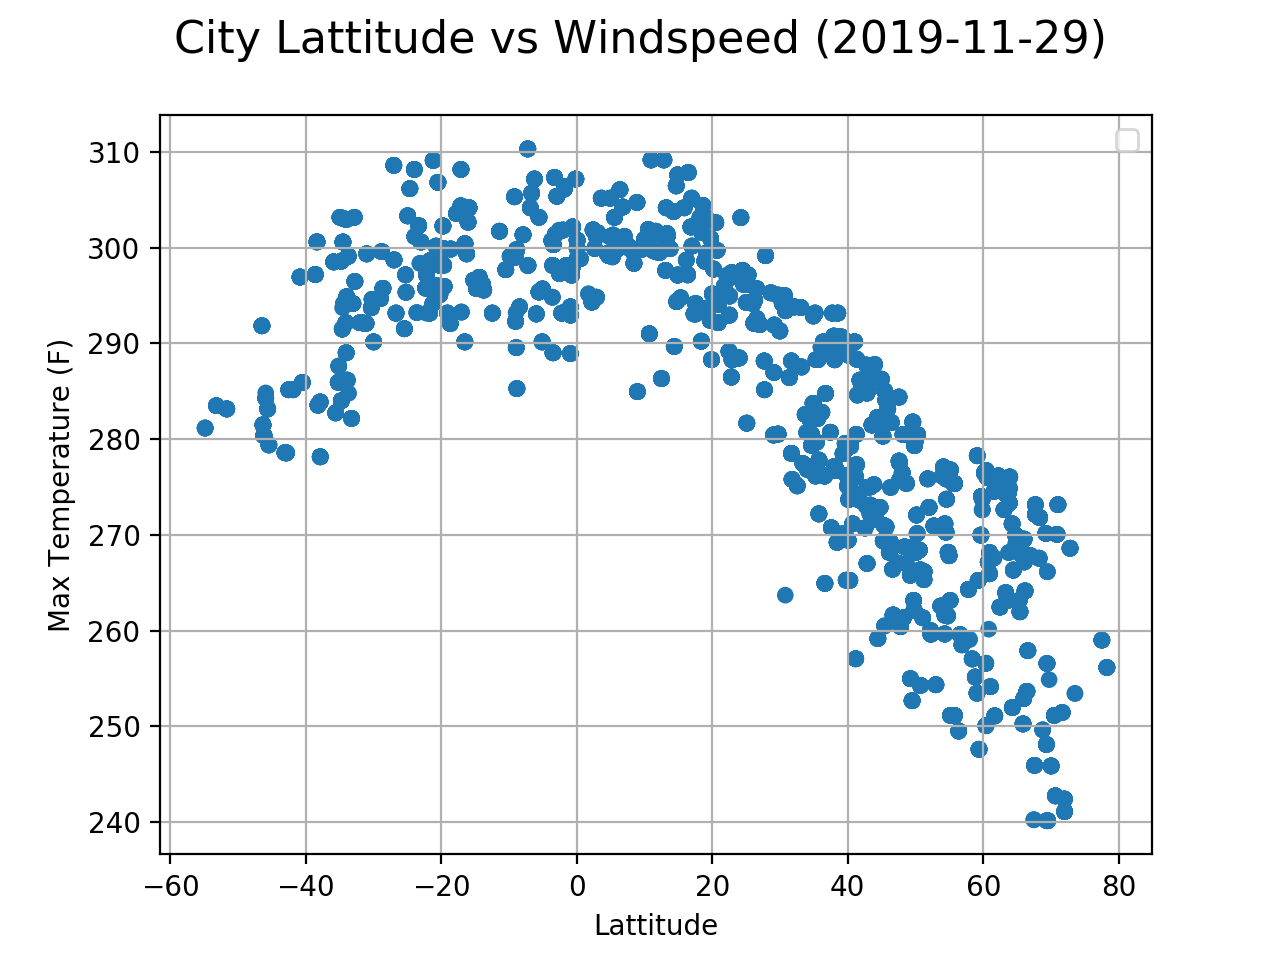

No handles with labels found to put in legend.


In [45]:
fig, ax = plt.subplots()

label = ["Lattitude","Temperature"]

ax.scatter(city_df["lattitude"], city_df["Temperature"],alpha=1, marker='o',edgecolors='none')

ax.legend()
ax.grid(True)

fig.suptitle("City Lattitude vs Max Temperature ("+today+")", fontsize=16)

ax.set_xlabel("Lattitude")
ax.set_ylabel("Max Temperature (F)")

plt.show()
plt.savefig("LatvsTemp.png")

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


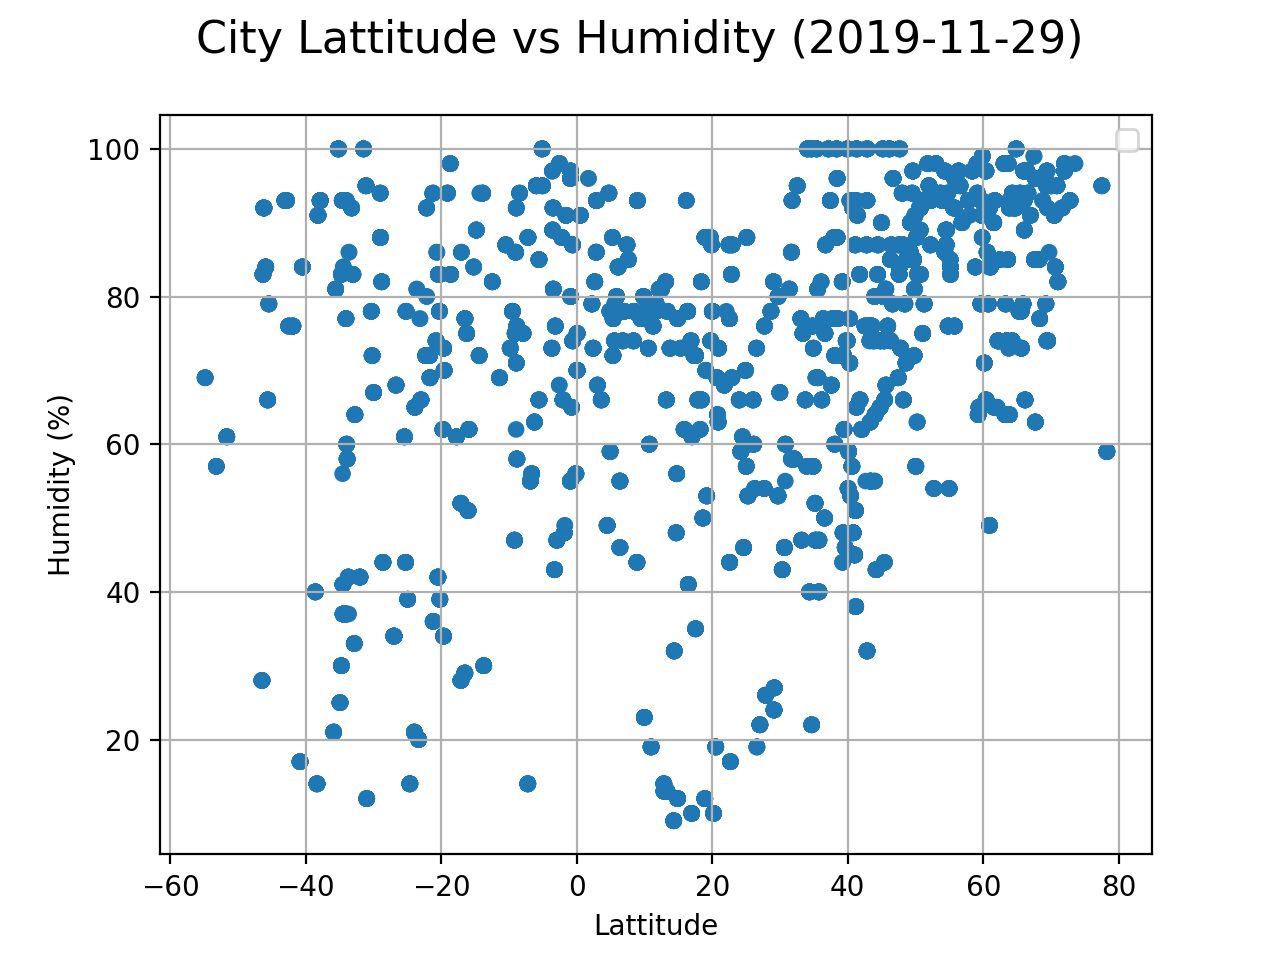

No handles with labels found to put in legend.


In [52]:
fig, ax = plt.subplots()

label = ["Lattitude","Humidity"]

ax.scatter(city_df["lattitude"], city_df["Humidity"],alpha=1, marker='o',edgecolors='none')

ax.legend()
ax.grid(True)

fig.suptitle("City Lattitude vs Humidity ("+today+")", fontsize=16)

ax.set_xlabel("Lattitude")
ax.set_ylabel("Humidity (%)")

plt.show()
plt.savefig("Latvshum.png")

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


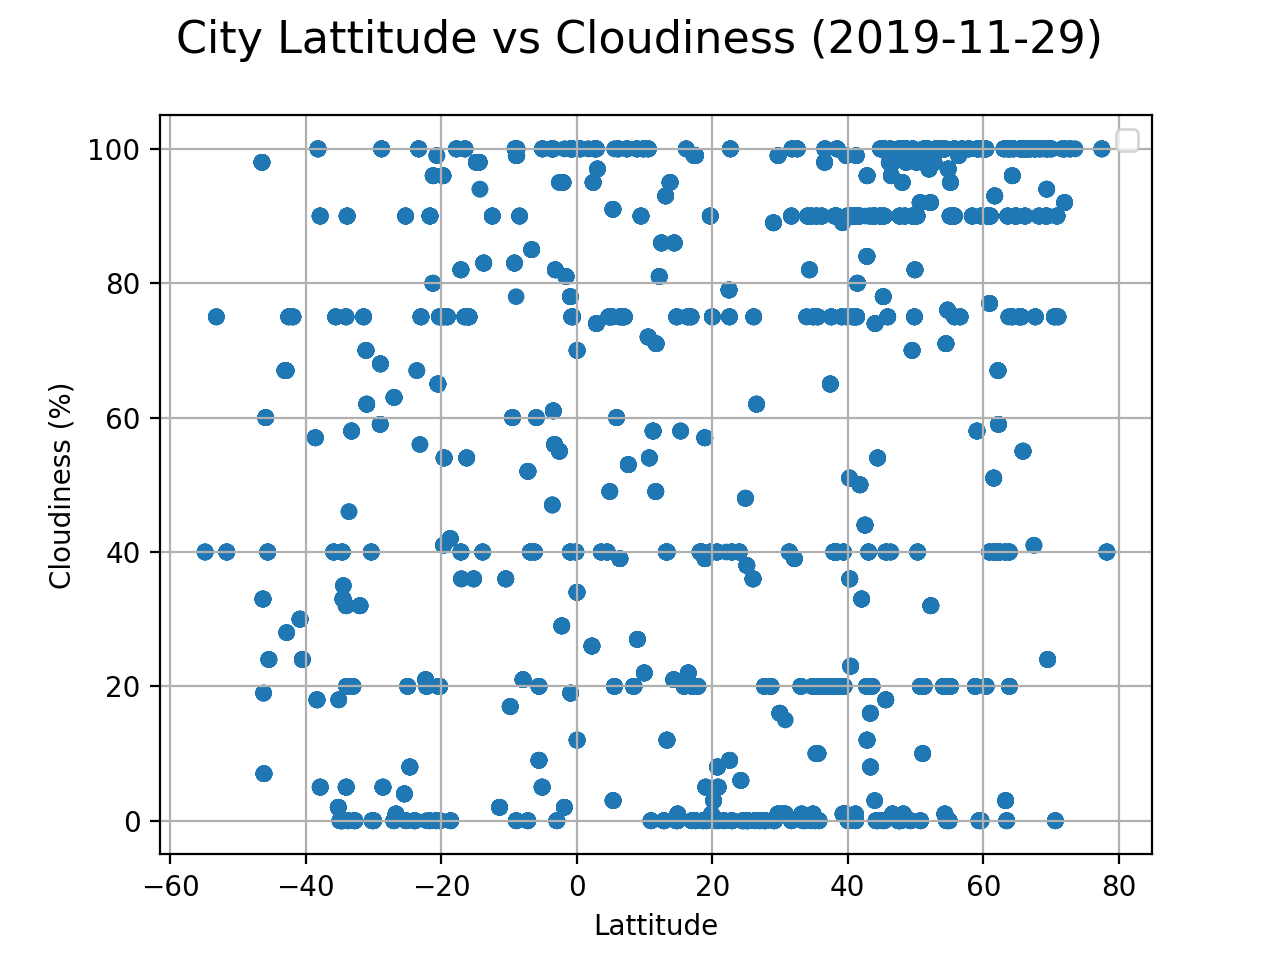

No handles with labels found to put in legend.


In [53]:
fig, ax = plt.subplots()

label = ["Lattitude","Cloudiness"]

ax.scatter(city_df["lattitude"], city_df["Cloudiness"],alpha=1, marker='o',edgecolors='none')

ax.legend()
ax.grid(True)

fig.suptitle("City Lattitude vs Cloudiness ("+today+")", fontsize=16)

ax.set_xlabel("Lattitude")
ax.set_ylabel("Cloudiness (%)")

plt.show()
plt.savefig("Latvscloud.png")

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


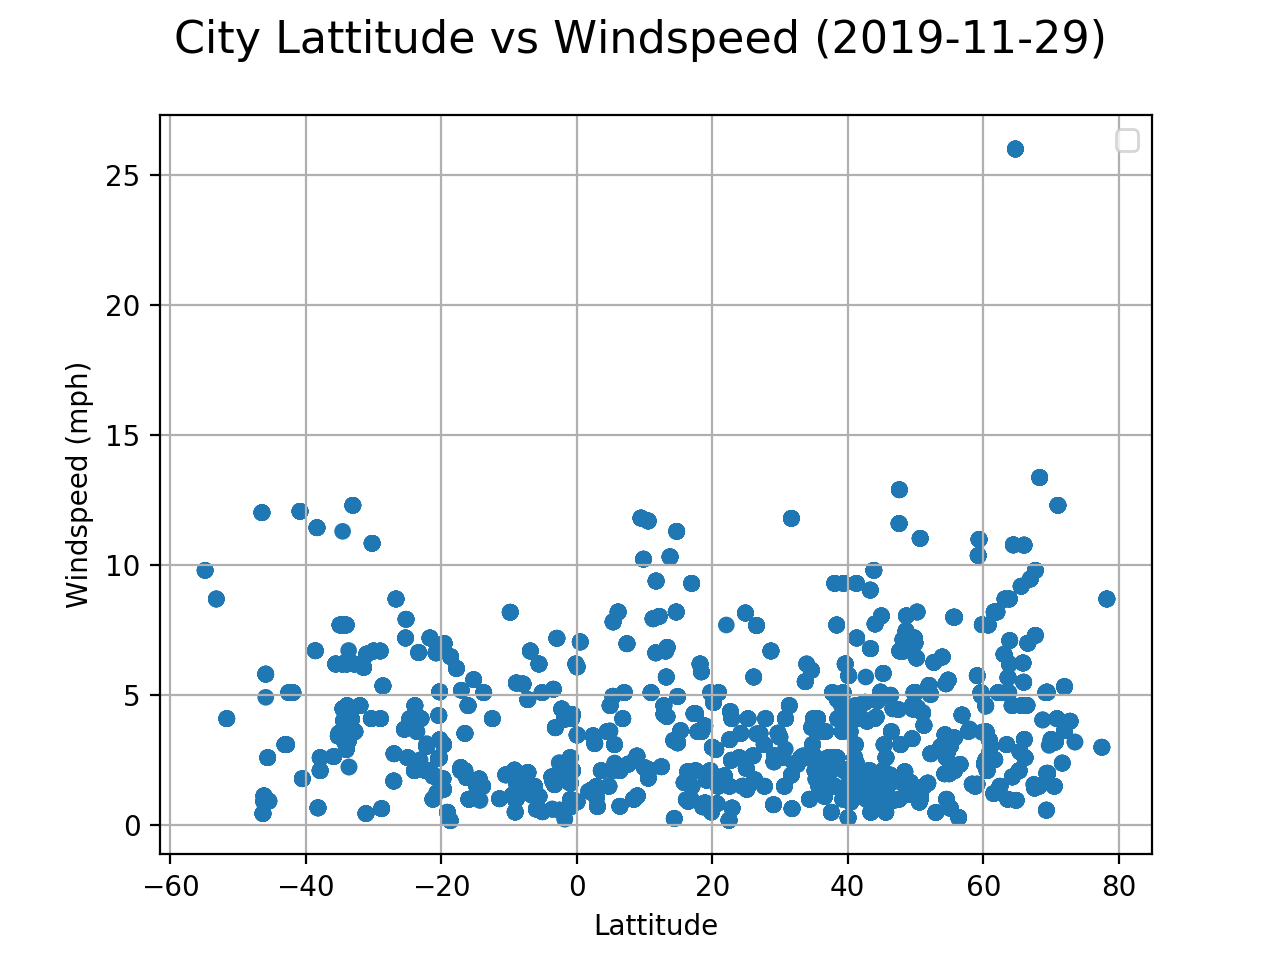

No handles with labels found to put in legend.


In [54]:
fig, ax = plt.subplots()

label = ["Lattitude","Wind Speed"]

ax.scatter(city_df["lattitude"], city_df["Windspeed"],alpha=1, marker='o',edgecolors='none')

ax.legend()
ax.grid(True)

fig.suptitle("City Lattitude vs Windspeed ("+today+")", fontsize=16)

ax.set_xlabel("Lattitude")
ax.set_ylabel("Windspeed (mph)")

plt.show()
plt.savefig("Latvswind.png")